# Internship Task : Bankig Fraud Detection

# Context 

It is important that banking services providing companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content

The datasets contains transactions made by credit card. This dataset presents transactions where we have 1142 frauds out of 1048575 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.00108% of all transaction.

The dataset contains features name 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud','isFlaggedFraud'. The feature 'amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'isFraud' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



# Importing Usable Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Loading the Dataset to Pandas DataFrame


In [2]:
trans_data = pd.read_csv("fraud.csv")

In [3]:
trans_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Understanding the dataset

In [4]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [5]:
trans_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [6]:
#checking null data
trans_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
trans_data.isnull().values.any()

False

Above operation specifies there is no Null Values in the dataset

# Dropping the column which is not usefull in dataset


Dropping nameOrig, nameDest and type because they are not usefull for the task

In [8]:
updated_data = trans_data.drop(['nameOrig','nameDest','type'], axis=1)

In [9]:
updated_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [10]:
updated_data.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [11]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   amount          1048575 non-null  float64
 2   oldbalanceOrg   1048575 non-null  float64
 3   newbalanceOrig  1048575 non-null  float64
 4   oldbalanceDest  1048575 non-null  float64
 5   newbalanceDest  1048575 non-null  float64
 6   isFraud         1048575 non-null  int64  
 7   isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 64.0 MB


# Plotting the differnce between legit and fraud transaction

Text(0, 0.5, 'Frequency')

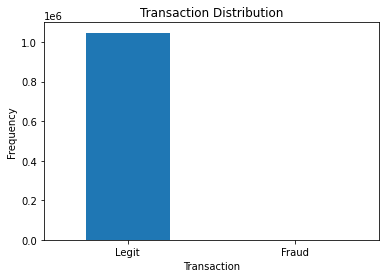

In [12]:
count_fraud = pd.value_counts(updated_data['isFraud'], True)

count_fraud.plot(kind = "bar", rot=0)

plt.title("Transaction Distribution")

plt.xticks(range(2), ["Legit","Fraud"])

plt.xlabel("Transaction")

plt.ylabel("Frequency")

Above operation shows that there is very difference between fraud and legit. That's why is very imbalanced dataset.

# Distribution of Fraud transaction and Legit transaction

In [13]:
updated_data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

0--> Legit Transaction




1--> Fraud Transaction

# Saperating both Legit and Fraud transaction for analysis

In [14]:
Fraud = updated_data[updated_data['isFraud']==1]

Legit = updated_data[updated_data['isFraud']==0]


In [15]:
print(Fraud.shape)

print(Legit.shape)

(1142, 8)
(1047433, 8)


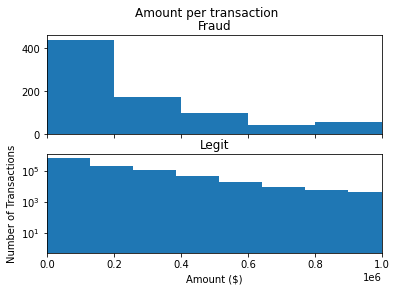

In [16]:
# Plotting histoghraph to show the amount per transaction
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction ')
bins = 50
ax1.hist(Fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Legit.amount, bins = bins)
ax2.set_title('Legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 1000000))
plt.yscale('log')
plt.show();

In [17]:
Fraud.amount.describe()

count    1.142000e+03
mean     1.192629e+06
std      2.030599e+06
min      1.190000e+02
25%      8.607017e+04
50%      3.531794e+05
75%      1.248759e+06
max      1.000000e+07
Name: amount, dtype: float64

In [18]:
Legit.amount.describe()

count    1.047433e+06
mean     1.575397e+05
std      2.541883e+05
min      1.000000e-01
25%      1.213487e+04
50%      7.621497e+04
75%      2.134928e+05
max      6.419835e+06
Name: amount, dtype: float64

# Compare the values for both transaction


In [19]:
updated_data.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,26.942944,1.575397e+05,8.736338e+05,894746.395080,978732.769117,1.114237e+06,0.0
1,48.272329,1.192629e+06,1.218636e+06,33944.321208,452866.124527,1.077940e+06,0.0


# Under Sampling 

Creat a sample dataset containing similar distribution of both legit and fraud transactions

no. of fraud-->1142

In [20]:
Legit_sample = Legit.sample(n=1142)

#calculating the outlier

outlier_fraction = len(Fraud)/(len(Legit_sample))

outlier_fraction

1.0

Here with help of sampling method, outlier_fraction is 1.0 which mean there is no outlier present in the updated dataset.

merging two dataframes(fraud,legit_sample)

In [21]:
Sample = pd.concat([Legit_sample,Fraud],axis=0)

In [22]:
Sample.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
684172,36,329925.79,701942.00,372016.21,506398.16,836323.94,0,0
249151,14,534185.67,257288.00,0.00,189115.68,228799.31,0,0
216739,13,4454.53,0.00,0.00,0.00,0.00,0,0
1006472,46,204.83,19764.00,19559.17,0.00,0.00,0,0
60056,9,64478.27,95898.43,31420.15,24002.00,177834.31,0,0


In [23]:
Sample.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1047888,95,56745.14,56745.14,0.0,51433.88,108179.02,1,0
1048221,95,33676.59,33676.59,0.0,0.00,0.00,1,0
1048222,95,33676.59,33676.59,0.0,0.00,33676.59,1,0
1048323,95,87999.25,87999.25,0.0,0.00,0.00,1,0
1048324,95,87999.25,87999.25,0.0,0.00,87999.25,1,0


In [24]:
Sample['isFraud'].value_counts()

0    1142
1    1142
Name: isFraud, dtype: int64

In [25]:
Sample.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,26.766200,1.596868e+05,8.722611e+05,897193.960622,967498.538757,1.112532e+06,0.0
1,48.272329,1.192629e+06,1.218636e+06,33944.321208,452866.124527,1.077940e+06,0.0


# Finding Correlation between features

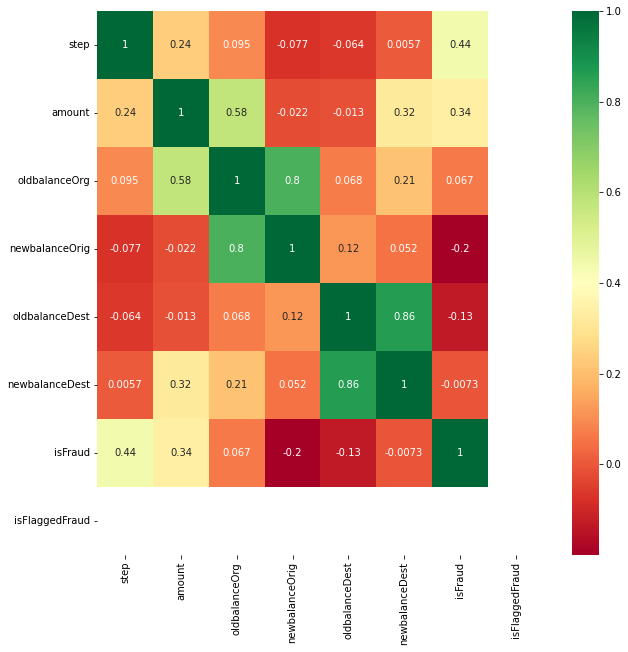

In [26]:
corrmat = Sample.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(Sample[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
print("Top corelated features are:-", top_corr_features)

Top corelated features are:- Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


#  Split the data into features and target


In [28]:
X = Sample.drop(['isFraud'], axis=1)

Y = Sample['isFraud']

In [29]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
684172,36,329925.79,701942.00,372016.21,506398.16,836323.94,0
249151,14,534185.67,257288.00,0.00,189115.68,228799.31,0
216739,13,4454.53,0.00,0.00,0.00,0.00,0
1006472,46,204.83,19764.00,19559.17,0.00,0.00,0
60056,9,64478.27,95898.43,31420.15,24002.00,177834.31,0
...,...,...,...,...,...,...,...
1047888,95,56745.14,56745.14,0.00,51433.88,108179.02,0
1048221,95,33676.59,33676.59,0.00,0.00,0.00,0
1048222,95,33676.59,33676.59,0.00,0.00,33676.59,0
1048323,95,87999.25,87999.25,0.00,0.00,0.00,0


In [30]:
Y

684172     0
249151     0
216739     0
1006472    0
60056      0
          ..
1047888    1
1048221    1
1048222    1
1048323    1
1048324    1
Name: isFraud, Length: 2284, dtype: int64

# Split the data into training data and test data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,  stratify=Y, random_state=1)

In [32]:
print(X.shape,X_train.shape, X_test.shape)

(2284, 7) (1827, 7) (457, 7)


In [33]:
print(Y.shape,Y_train.shape, Y_test.shape)

(2284,) (1827,) (457,)


# Model Training with logistic regression

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train, Y_train)

LogisticRegression()

In [36]:
X_train_pred = model.predict(X_train)
training_data_accuracy =accuracy_score(X_train_pred,Y_train)

In [37]:
print("Accuracy Score on Training data", training_data_accuracy)

Accuracy Score on Training data 0.9408866995073891


In [38]:
X_test_pred = model.predict(X_test)
testing_data_accuracy =accuracy_score(X_test_pred,Y_test)

In [39]:
print("Accuracy Score on Testing data", testing_data_accuracy)

Accuracy Score on Testing data 0.9431072210065645


# Showing the Classification Report

In [40]:
print(classification_report(Y_test,X_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       228
           1       0.93      0.96      0.94       229

    accuracy                           0.94       457
   macro avg       0.94      0.94      0.94       457
weighted avg       0.94      0.94      0.94       457



# Observations 

Logistic Regression give accuracy of approx. 94% which is a good approach.

We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases


# Candidate expectations

# *Data cleaning including missing values, outliers and multi-collinearity

1. Data Cleaning:

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

2. Outliers:

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.

3. multi-collinearity:

Multicollinearity occurs when two or more independent variables(also known as predictor) are highly correlated with one another in a regression model. This means that an independent variable can be predicted from another independent variable in a regression model.

# *Describe your fraud detection model in elaboration 

The basic approach to fraud detection with an analytic model is to identify possible predictors of fraud associated with known fraudsters and their actions in the past. The most powerful fraud models (like the most powerful customer response models) are built on historical data.

If the fraud response can be identified, it can be used to characterize the behavior of the fraudster in the specific fraud act and in historical data. In this model i used Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring. In This dataset we also have to predict the weather it is fraud or not. Under sampling we concated the legit and fraud transaction with the ratio of 50:50, so that the outlier become zero. 


# How did you select variables to be included in the model?


When building a linear or logistic regression model, you should consider including:

1.Variables that are already proven in the literature to be related to the outcome.
2.Variables that can either be considered the cause of the exposure, the outcome, or both
3.Interaction terms of variables that have large main effects

# What kind of prevention should be adopted while company update its infrastructure?


Data should be updated time to time.